1. Define the parameters.

2. Define the Lagrangian.

$$ L(x, y, λ) = f(x, y) + λg(x, y) $$

3. Derive the Lagrangian to get the FOCs.

4. Solve the FOCs to get the endogenous variables in terms of exogenous parameters.

5. Define the equilibrium equation and substitute FOCs and Gen 0 solution.

6. Solve the equilibrium equation for the real interest rate.

7. Reinput the equilibrium

## OLG Baseline Model

In [ ]:
import sympy as sy
from sympy import symbols, IndexedBase, diff, solve, log, Eq
sy.init_printing()

# Define a time variable and time-varying variable.
t, λ, r, s, A_t, β, T, a, n, α, 𝛿 = symbols('t λ r s A_t β T a n α 𝛿')
c_o = IndexedBase('c^{o}')
c_y = IndexedBase('c^{y}')
w = IndexedBase('w')
w_y = IndexedBase('w^{y}')
N = IndexedBase('N')
τ = IndexedBase("τ")
k = IndexedBase("k")

endog = [c_y[t], c_o[t+1], λ]

## ––––––––––––––––– Utility Maximisation ––––––––––––––––– ##
# Define the Lagrangian function and constraints.
BC_y = Eq(c_y[t] + s, w[t]*A_t)
BC_o = Eq(c_o[t+1], s*(1 + r) - τ[t+1]*r*s + T*r)
savings = sy.solve(BC_y, s)[0]
BC_pv = BC_o.subs(s, savings)
f = log(c_y[t]) + β*log(c_o[t+1])
L = f + λ*(BC_pv.rhs - BC_pv.lhs)

print("Budget (young):")
display(BC_y)
print("\nBudget (old): ")
display(BC_o)
print("\nPV Budget: ")
display(BC_pv)
print("\nLagrangian:  ",)
display(L)



# Compute and solve the system of derivatives.
FOCs = [diff(L, var) for var in endog]
print("\nFOCs")
display(FOCs)
sols = solve(FOCs, endog, dict=True, manual=True)
print("\nSols")
display(sols)

## ––––––––––––––––– Equilibrium ––––––––––––––––– ##
# X = [Eq(sols[0][list(sols[0].keys())[i]], list(sols[0].keys())[i]) for i in range(len(sols[0].keys()))]

# equilibrium_eq = Eq(w_y[t] + w_o[t], c_y[t] + c_o[t])
# util_gen_0 = Eq(c_o[t], w_o[t])

# # Substitute into the equilibrium equation.
# equilibrium_eq = equilibrium_eq.subs({c_o[t]: w_o[t], c_y[t]: sols[0][c_y[t]]})

# r_ = solve(equilibrium_eq, [r], dict=True, exlude=[w_o[t], w_y[t]])
# #final_endog = [sy.simplify(eq.subs(r, r_[0][r])) for eq in X]

# print("FOCs solved for the utility maximisation exercise: ^", display(X))
# print("\n")
# print("Equilibrium real interest rate: ^", display(r_))
# print("\n")
# print("Final values for consumption: ^", display(final_endog))

Budget (young):


s + c^{y}[t] = Aₜ⋅w[t]


Budget (old): 


c^{o}[t + 1] = T⋅r - r⋅s⋅τ[t + 1] + s⋅(r + 1)


PV Budget: 


c^{o}[t + 1] = T⋅r - r⋅(Aₜ⋅w[t] - c^{y}[t])⋅τ[t + 1] + (r + 1)⋅(Aₜ⋅w[t] - c^{y
}[t])


Lagrangian:  


β⋅log(c^{o}[t + 1]) + λ⋅(T⋅r - r⋅(Aₜ⋅w[t] - c^{y}[t])⋅τ[t + 1] + (r + 1)⋅(Aₜ⋅w
[t] - c^{y}[t]) - c^{o}[t + 1]) + log(c^{y}[t])


FOCs


⎡                            1           β                                    
⎢λ⋅(r⋅τ[t + 1] - r - 1) + ────────, ──────────── - λ, T⋅r - r⋅(Aₜ⋅w[t] - c^{y}
⎣                         c^{y}[t]  c^{o}[t + 1]                              

                                                           ⎤
[t])⋅τ[t + 1] + (r + 1)⋅(Aₜ⋅w[t] - c^{y}[t]) - c^{o}[t + 1]⎥
                                                           ⎦


Sols


⎡⎧                        β + 1                                     β⋅(-Aₜ⋅r⋅w
⎢⎨λ: ───────────────────────────────────────────────, c^{o}[t + 1]: ──────────
⎣⎩   -Aₜ⋅r⋅w[t]⋅τ[t + 1] + Aₜ⋅r⋅w[t] + Aₜ⋅w[t] + T⋅r                          

[t]⋅τ[t + 1] + Aₜ⋅r⋅w[t] + Aₜ⋅w[t] + T⋅r)            -Aₜ⋅r⋅w[t]⋅τ[t + 1] + Aₜ⋅
─────────────────────────────────────────, c^{y}[t]: ─────────────────────────
             β + 1                                            (β + 1)⋅(-r⋅τ[t 

r⋅w[t] + Aₜ⋅w[t] + T⋅r⎫⎤
──────────────────────⎬⎥
+ 1] + r + 1)         ⎭⎦

In [ ]:
s_t = (w[t]*A_t - sols[0][c_y[t]]).simplify()

s_eq = Eq(s, (w[t]*A_t*β*(1 + r*(1 - τ[t+1])) - τ[t+1]*r*s)/((1 + β)*(1 + r*(1 - τ[t+1]))))
display(s_eq)
print("")
display(solve(s_eq, [s]))

    Aₜ⋅β⋅(r⋅(1 - τ[t + 1]) + 1)⋅w[t] - r⋅s⋅τ[t + 1]
s = ───────────────────────────────────────────────
             (β + 1)⋅(r⋅(1 - τ[t + 1]) + 1)        

⎡Aₜ⋅β⋅(-r⋅τ[t + 1] + r + 1)⋅w[t]⎤
⎢───────────────────────────────⎥
⎣-r⋅β⋅τ[t + 1] + r⋅β + r + β + 1⎦

In [ ]:
capital = Eq(k[t+1], ((1-α)*k[t]**(α)*β*(1 + (α*k[t+1]**(α-1)-𝛿)*(1 - τ[t+1]))) / (a*n*((1 + β)*(1 + (α * k[t+1]**(α-1) - 𝛿)*(1 - τ[t+1])) + τ[t+1]*(α*k[t+1]**(α-1) - 𝛿))))
#solve(capital, [k[t+1]])
Eq(capital.rhs.diff(τ[t+1]), 0).simplify()
#display(capital)

          ⎛  ⎛          α - 1    ⎞ ⎛        ⎛⎛          α - 1    ⎞            
β⋅(α - 1)⋅⎝- ⎝α⋅k[t + 1]      - 𝛿⎠⋅⎝(β + 1)⋅⎝⎝α⋅k[t + 1]      - 𝛿⎠⋅(τ[t + 1] -
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                         ⎛    
                                                                     a⋅n⋅⎝(β +

       ⎞   ⎛          α - 1    ⎞         ⎞   ⎛⎛          α - 1    ⎞           
 1) - 1⎠ - ⎝α⋅k[t + 1]      - 𝛿⎠⋅τ[t + 1]⎠ + ⎝⎝α⋅k[t + 1]      - 𝛿⎠⋅(τ[t + 1] 
──────────────────────────────────────────────────────────────────────────────
                                                                              
    ⎛⎛          α - 1    ⎞                   ⎞   ⎛          α - 1    ⎞        
 1)⋅⎝⎝α⋅k[t + 1]      - 𝛿⎠⋅(τ[t + 1] - 1) - 1⎠ - ⎝α⋅k[t + 1]      - 𝛿⎠⋅τ[t + 1

        ⎞ ⎛            α - 1               ⎛      

In [ ]:
capital = Eq(k, ((1-α)*k**(α)*β*(1 + (α*k**(α-1)-𝛿)*(1 - τ[t+1]))) / (a*n*((1 + β)*(1 + (α * k**(α-1) - 𝛿)*(1 - τ[t+1])) + τ[t+1]*(α*k**(α-1) - 𝛿))))
capital.rhs.diff(τ[t+1])

                                 ⎛     α - 1    ⎞  α                          
                       β⋅(1 - α)⋅⎝- α⋅k      + 𝛿⎠⋅k                           
─────────────────────────────────────────────────────────────────────────── + 
    ⎛        ⎛               ⎛   α - 1    ⎞    ⎞   ⎛   α - 1    ⎞         ⎞   
a⋅n⋅⎝(β + 1)⋅⎝(1 - τ[t + 1])⋅⎝α⋅k      - 𝛿⎠ + 1⎠ + ⎝α⋅k      - 𝛿⎠⋅τ[t + 1]⎠   
                                                                              

          ⎛               ⎛   α - 1    ⎞    ⎞ ⎛     α - 1               ⎛     
β⋅(1 - α)⋅⎝(1 - τ[t + 1])⋅⎝α⋅k      - 𝛿⎠ + 1⎠⋅⎝- α⋅k      + 𝛿 - (β + 1)⋅⎝- α⋅k
──────────────────────────────────────────────────────────────────────────────
                                                                              
            ⎛        ⎛               ⎛   α - 1    ⎞    ⎞   ⎛   α - 1    ⎞     
        a⋅n⋅⎝(β + 1)⋅⎝(1 - τ[t + 1])⋅⎝α⋅k      - 𝛿⎠ + 1⎠ + ⎝α⋅k      - 𝛿⎠⋅τ[t 

α - 1    ⎞⎞  α
      + 𝛿⎠⎠⋅k 
──────────────
     

## OLG w/ Fiscal Policy

In [ ]:
import sympy as sy
from sympy import symbols, IndexedBase, diff, solve, log, Eq
sy.init_printing()

# Define a time variable and time-varying variable.
t, λ, r = symbols('t λ r')
c = IndexedBase('c')
T = IndexedBase('T')
w = IndexedBase('w')

endog = [c[t], c[t+1], λ]

# Define the Lagrangian function and constraints.
g = c[t] + c[t+1]/(1+r) - w[t+1]/(1+r) - w[t] + T[t+1]/(1+r) + T[t]
L = log(c[t]) + log(c[t+1]) + λ*g

# Compute the system of derivatives.
eqs = [diff(L, var) for var in endog]

# Compute the Lagrange multiplier.
sols = solve(eqs, endog, dict=True)

In [ ]:
sols

⎡⎧                        2⋅(r + 1)                                   r⋅T[t]  
⎢⎨λ: ───────────────────────────────────────────────────, c[t + 1]: - ────── +
⎣⎩   r⋅T[t] - r⋅w[t] + T[t + 1] + T[t] - w[t + 1] - w[t]                2     

 r⋅w[t]   T[t + 1]   T[t]   w[t + 1]   w[t]        -r⋅T[t] + r⋅w[t] - T[t + 1]
 ────── - ──────── - ──── + ──────── + ────, c[t]: ───────────────────────────
   2         2        2        2        2                               2⋅(r +

 - T[t] + w[t + 1] + w[t]⎫⎤
─────────────────────────⎬⎥
 1)                      ⎭⎦

## OLG w/ Money

In [ ]:
import sympy as sy
from sympy import symbols, IndexedBase, diff, solve, log, Eq
sy.init_printing()

# Define a time variable and time-varying variable.
t, λ, r = symbols('t λ r')
c_o = IndexedBase('c^{o}')
c_y = IndexedBase('c^{y}')
w_o = IndexedBase('w^{o}')
w_y = IndexedBase('w^{y}')
p = IndexedBase('p')
m = IndexedBase('m')
endog = [c_y[t], c_o[t+1], λ]

## ––––––––––––––––– Utility Maximisation ––––––––––––––––– ##
# Define the Lagrangian function and constraints.
BC_y = Eq(p[t]*c_y[t] + m[t], p[t]*w_y[t])
BC_o = Eq(p[t+1]*c_o[t+1], p[t+1]*w_o[t+1] + m[t+1])
money_demand = sy.solve(BC_y, m[t])[0]
BC_pv = BC_o.subs(m[t+1], money_demand)
f = log(c_y[t]) + log(c_o[t+1])
L = f + λ*(BC_pv.rhs - BC_pv.lhs)

# Compute and solve the system of derivatives.
FOCs = [diff(L, var) for var in endog]
sols = solve(FOCs, endog, dict=True)

## ––––––––––––––––– Money Demand ––––––––––––––––– ##
solved_moneyD = money_demand.subs(c_y[t], sols[0][c_y[t]])
p_solved_md = solve(Eq(m[t], solved_moneyD), [p[t+1]])

## ––––––––––––––––– Equilibrium ––––––––––––––––– ##
X = [Eq(sols[0][list(sols[0].keys())[i]], list(sols[0].keys())[i]) for i in range(len(sols[0].keys()))]

equilibrium_eq = Eq(w_y[t] + w_o[t], c_y[t] + c_o[t])
util_gen_0 = Eq(c_o[t], w_o[t] + m[t]/p[t])

# Substitute into the equilibrium equation.
equilibrium_eq = equilibrium_eq.subs({c_o[t]: util_gen_0.rhs, c_y[t]: sols[0][c_y[t]]})

p_solved = solve(equilibrium_eq, [p[t+1]], dict=True, exlude=[w_o[t], w_y[t]])
#final_endog = [sy.simplify(eq.subs(r, r_[0][r])) for eq in X]

print("FOCs solved for the utility maximisation exercise: \n")
display(X)
print("\n")
print("Equilibrium price (equil): \n")
display(p_solved)
print("\n")
print("Equilibrium price (money): \n")
display(p_solved_md)

FOCs solved for the utility maximisation exercise: 



⎡                  2                        p[t + 1]⋅w^{o}[t + 1] + p[t]⋅w^{y}
⎢───────────────────────────────────── = λ, ──────────────────────────────────
⎣p[t + 1]⋅w^{o}[t + 1] + p[t]⋅w^{y}[t]                      2⋅p[t]            

[t]             w^{o}[t + 1]   p[t]⋅w^{y}[t]               ⎤
─── = c^{y}[t], ──────────── + ───────────── = c^{o}[t + 1]⎥
                     2           2⋅p[t + 1]                ⎦



Equilibrium price (equil): 



⎡⎧          -2⋅m[t] + p[t]⋅w^{y}[t]⎫⎤
⎢⎨p[t + 1]: ───────────────────────⎬⎥
⎣⎩                w^{o}[t + 1]     ⎭⎦



Equilibrium price (money): 



⎡-2⋅m[t] + p[t]⋅w^{y}[t]⎤
⎢───────────────────────⎥
⎣      w^{o}[t + 1]     ⎦

In [ ]:
display(L)

λ⋅((-c^{y}[t] + w^{y}[t])⋅p[t] - c^{o}[t + 1]⋅p[t + 1] + p[t + 1]⋅w^{o}[t + 1]
) + log(c^{o}[t + 1]) + log(c^{y}[t])

# Seminar Questions

## 1.

Consider the overlapping generations model in the first part of the notes with endowments ωty and ωto that can vary across generations. Show that the unique competitive equilibrium continues to be no trade if:

• population varies exogenously across generations, with N0 denoting the population of the initial old generation and Nt denoting the population of the generation born in period t ≥ 1; and

• each consumer born in period t ≥ 1 has the same utility function Ut(cyt , cot+1) where Ut satisfies standard microeconomic properties but is not restricted to be Cobb–Douglas.

In [ ]:
import sympy as sy
from sympy import symbols, IndexedBase, diff, solve, log, Eq
sy.init_printing()

# Define a time variable and time-varying variable.
t, λ, r, s = symbols('t λ r s')
c_o = IndexedBase('c^{o}')
c_y = IndexedBase('c^{y}')
w_o = IndexedBase('w^{o}')
w_y = IndexedBase('w^{y}')
N = IndexedBase('N')
endog = [c_y[t], c_o[t+1], λ]

## ––––––––––––––––– Utility Maximisation ––––––––––––––––– ##
# Define the Lagrangian function and constraints.
BC_y = Eq(c_y[t] + s, w_y[t])
BC_o = Eq(c_o[t+1], s*(1+r) + w_o[t+1])
savings = sy.solve(BC_y, s)[0]
BC_pv = BC_o.subs(s, savings)
f = log(c_y[t]) + log(c_o[t+1])
L = f + λ*(BC_pv.rhs - BC_pv.lhs)

# Compute and solve the system of derivatives.
FOCs = [diff(L, var) for var in endog]
sols = solve(FOCs, endog, dict=True)

## ––––––––––––––––– Equilibrium ––––––––––––––––– ##
X = [Eq(sols[0][list(sols[0].keys())[i]], list(sols[0].keys())[i]) for i in range(len(sols[0].keys()))]

equilibrium_eq = Eq(w_y[t] + w_o[t], c_y[t] + c_o[t])
util_gen_0 = Eq(c_o[t], w_o[t])

# Substitute into the equilibrium equation.
equilibrium_eq = equilibrium_eq.subs({c_o[t]: w_o[t], c_y[t]: sols[0][c_y[t]]})

r_ = solve(equilibrium_eq, [r], dict=True, exlude=[w_o[t], w_y[t]])
final_endog = [sy.simplify(eq.subs(r, r_[0][r])) for eq in X]

print("FOCs solved for the utility maximisation exercise: ^", display(X))
print("\n")
print("Equilibrium real interest rate: ^", display(r_))
print("\n")
print("Final values for consumption: ^", display(final_endog))

⎡                 2                        r⋅w^{y}[t] + w^{o}[t + 1] + w^{y}[t
⎢──────────────────────────────────── = λ, ───────────────────────────────────
⎣r⋅w^{y}[t] + w^{o}[t + 1] + w^{y}[t]                   2⋅(r + 1)             

]             r⋅w^{y}[t]   w^{o}[t + 1]   w^{y}[t]               ⎤
─ = c^{y}[t], ────────── + ──────────── + ──────── = c^{o}[t + 1]⎥
                  2             2            2                   ⎦

FOCs solved for the utility maximisation exercise: ^ None




⎡⎧   w^{o}[t + 1] - w^{y}[t]⎫⎤
⎢⎨r: ───────────────────────⎬⎥
⎣⎩           w^{y}[t]       ⎭⎦

Equilibrium real interest rate: ^ None




⎡         1                                                        ⎤
⎢λ = ────────────, c^{y}[t] = w^{y}[t], c^{o}[t + 1] = w^{o}[t + 1]⎥
⎣    w^{o}[t + 1]                                                  ⎦

Final values for consumption: ^ None


## Symbolic Lagrangian

In [ ]:
#Constrained Optimisation with Equality Constraints
import sympy as sy
import numpy as np
from sympy import symbols, Function, Eq, dsolve, diff, oo, print_latex
sy.init_printing()

a, A, m, l, b, λ, w, T0, x, y, p, z, β, p_, pbar, s_, sbar, θ_, θbar, μ = sy.symbols('a A m l b λ w T0 x y p z β p pbar s sbar θ θbar μ')  # Define Symbols
w_, wbar, z_, zbar = symbols("w_u wbar z_u zbar")

constraints = [
    Eq(0.25*w_**(1/3) + 0.75*wbar**(1/3) - 2, 2),
]
lag_multis = [λ, μ]

f = 0.25*(100 - w_) + 0.75*(400 - wbar)
endog = [w_, wbar, λ]

L = f

print("Function to optimise:")
display(f)
print("\nContstraints:")
[display(const) for const in constraints]
print("\nEndog variables (inc lambdas):")
display(endog)

for multi, const in zip(lag_multis, constraints):
  L = L + multi*(const.rhs - const.lhs)
  print("\nLagrangian to be optimised:")
  display(L)

# Compute and solve the system of derivatives.
FOCs = [diff(L, var) for var in endog]
sols = solve(FOCs, endog, dict=True)

print("\nFinal values:")
display(sols)


Function to optimise:


-0.25⋅wᵤ - 0.75⋅w̅ + 325.0


Contstraints:


       0.333333333333333         0.333333333333333        
0.25⋅wᵤ                  + 0.75⋅w̅                  - 2 = 2


Endog variables (inc lambdas):


[wᵤ, w̅, λ]


Lagrangian to be optimised:


                      ⎛         0.333333333333333         0.333333333333333   
-0.25⋅wᵤ - 0.75⋅w̅ + λ⋅⎝- 0.25⋅wᵤ                  - 0.75⋅w̅                  

 ⎞        
+ 4⎠ + 325.0


Final values:


[{wᵤ: 64.0, w̅: 64.0, λ: -48.0}]

## Linear Numerical Optimisation

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Objective function coefficients (minimizing -(175 - 0.25w_L - 0.75w_h))
c = np.array([0.25, 0.75])

# Coefficients for inequality constraints (left-hand side)
A = np.array([
    [-0.25, -0.75],  # 0.75w_h + 0.25w_L  ≥ 10 => -0.25w_L - 0.75w_h  ≤ -10
    [-1, 1],         # w_h - w_L  ≥ 12       =>     -w_L + w_h       ≤ -12
])

# Right-hand side of inequality constraints
b = np.array([-10, -12])

# Bounds for the decision variables w_L and w_h
w_L_bounds = (0, None)
w_h_bounds = (0, None)

# Solve the linear program
res = linprog(c, A_ub=A, b_ub=b, bounds=[w_L_bounds, w_h_bounds], method='highs')

# Print the results
w_L, w_h = res.x
max_F = 175 - 0.25 * w_L - 0.75 * w_h
print(f"Optimal solution: w_L = {w_L}, w_h = {w_h}")
print(f"Maximum value of F(w_L, w_h): {max_F}")


Optimal solution: w_L = 40.0, w_h = 0.0
Maximum value of F(w_L, w_h): 165.0


## Nonlinear Numerical Optimisation

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Objective function (minimizing -(175 - 0.25w_L - 0.75w_h))
def objective(w):
    w_L, w_h = w
    return -1 * (175 - 0.25 * w_L**2 - 0.75 * w_h**2)

# Constraints
def constraint1(w):
    w_L, w_h = w
    return 0.5 * w_L + 1.5 * w_h - 6

def constraint2(w):
    w_L, w_h = w
    return 0.5 * w_L + 1.5 * w_h - 6 - 1.5 * w_L - 0.5 * w_h

# Constraints dictionary
constraints = (
    {"type": "ineq", "fun": constraint1},
    {"type": "ineq", "fun": constraint2},
)

# Initial guess (starting point for the optimization algorithm)
w0 = np.array([1, 1])

# Bounds for the decision variables w_L and w_h
bounds = [(0, None), (0, None)]

# Solve the nonlinear optimization problem
res = minimize(objective, w0, bounds=bounds, constraints=constraints)

# Print the results
w_L, w_h = res.x
max_F = 175 - 0.25 * w_L - 0.75 * w_h
print(f"Optimal solution: w_L = {w_L}, w_h = {w_h}")
print(f"Maximum value of F(w_L, w_h): {max_F}")


Optimal solution: w_L = 0.0, w_h = 6.000000000000313
Maximum value of F(w_L, w_h): 170.49999999999977


In [ ]:
import sympy as sy
from sympy import symbols, IndexedBase, diff, solve, log, Eq, sqrt
sy.init_printing()

# Define a time variable and time-varying variable.
t, λ, r, s = symbols('t λ r s')
w_L = IndexedBase('w_{L}')
w_H = IndexedBase('w_{H}')

sy.solve([Eq(0.25*(w_L**(1/3) - 2) + 0.75*(w_H**(1/3) - 2), 2), Eq(0.25*(w_L**(1/3) - 2) + 0.75*(w_H**(1/3) - 2), 0.75*(w_L**(1/3) - 1) + 0.25*(w_H**(1/3) - 1))], [w_L, w_H], dict=True)

[{w_{H}: 91.125, w_{L}: 15.625}]

## Algebra

In [ ]:
import sympy as sy
from sympy import symbols, IndexedBase, diff, solve, log, Eq, sqrt
sy.init_printing()

# Define a time variable and time-varying variable.
t, λ, r, s, v, x_j, x_i, c_i, c_j = symbols('t λ r s v x_j x_i c_i c_j')
#x_j = v*c_i/(c_i + c_j)**2

exp = Eq(x_j, sqrt((v*x_i)/c_j) - x_i)
dxidxj = sy.diff(exp.rhs, x_i)
final = dxidxj.subs(x_i, v*c_j/((c_i + c_j)**2)).simplify()

In [ ]:
exp2.subs({v: 1, c_i: 1, c_j: 1, x_j: 1}) == dxidxj.subs({v: 1, c_i: 1, c_j: 1, x_j: 1}

True

In [ ]:
sy.expand(final), sy.simplify(final), sy.factor(final), sy.collect(final, c_i), sy.cancel(final), sy.powsimp(final)

## KT Conditions

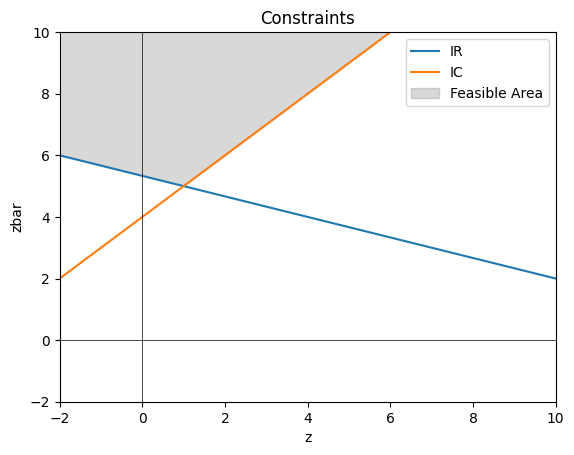

Function to optimise:


         3         3        
- 0.25⋅zᵤ  - 0.75⋅z̅  + 325.0


Contstraints:


0.25⋅zᵤ + 0.75⋅z̅ - 2 = 2

0.25⋅zᵤ + 0.75⋅z̅ - 2 = 0.75⋅zᵤ + 0.25⋅z̅


Endog variables (inc lambdas):


[z̅, zᵤ]

[z̅, zᵤ, λ, μ]


Lagrangian to be optimised:


         3         3                                                          
- 0.25⋅zᵤ  - 0.75⋅z̅  + λ⋅(0.25⋅zᵤ + 0.75⋅z̅ - 4) + μ⋅(-0.5⋅zᵤ + 0.5⋅z̅ - 2) +

   
 325.0


First-Order Conditions:


⎡        2                            2                                       
⎣- 2.25⋅z̅  + 0.75⋅λ + 0.5⋅μ, - 0.75⋅zᵤ  + 0.25⋅λ - 0.5⋅μ, 0.25⋅zᵤ + 0.75⋅z̅ -

                     ⎤
 4, -0.5⋅zᵤ + 0.5⋅z̅ - 2⎦


μ > 0 & λ > 0 (IR & IC binding)


[{zᵤ: 1.0, z̅: 5.0, λ: 57.0, μ: 27.0}]

TEST λ: True
TEST μ: True

μ = 0 & λ > 0 (IR binding)


[{zᵤ: -8.0, z̅: 8.0, λ: 192.0}, {zᵤ: 4.0, z̅: 4.0, λ: 48.0}]

True

False


μ > 0 & λ = 0 (IC binding)


[{zᵤ: -3.0 - 1.73205080756888⋅ⅈ, z̅: 1.0 - 1.73205080756888⋅ⅈ, μ: -9.0 - 15.58
84572681199⋅ⅈ}, {zᵤ: -3.0 + 1.73205080756888⋅ⅈ, z̅: 1.0 + 1.73205080756888⋅ⅈ, 
μ: -9.0 + 15.5884572681199⋅ⅈ}]

False

μ = 0 & λ = 0 (neither binding)


[{zᵤ: 0.0, z̅: 0.0}]

False

False

In [ ]:
# Constrained Optimisation with Inequality Constraints
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Function, Eq, dsolve, diff, oo, print_latex, sqrt, solve
sy.init_printing()

a, A, m, l, b, λ, w, T0, x, y, p, z, β, p_, pbar, s_, sbar, θ_, θbar, μ = sy.symbols('a A m l b λ w T0 x y p z β p pbar s sbar θ θbar μ')  # Define Symbols
w_, wbar, z_, zbar = symbols("w_u wbar z_u zbar")

# Make sure x ≥ y Eq(x, y)
constraints = [
    Eq(0.25*z_ + 0.75*zbar - 2, 2),
    Eq(0.25*z_ + 0.75*zbar - 2, 0.75*z_ + 0.25*zbar - 0)
]
lag_multis = [λ, μ]

f = 0.25*(100 - z_**3) + 0.75*(400 - zbar**3)
endog = [zbar, z_]
endog_all = endog + lag_multis

# –––––––––––––––––––––––––––––––– Plotting ––––––––––––––––––––––––––––––––––– #

# Plotting constraints
z_values = np.linspace(-2, 10, 1000)

zbar_values_1 = np.array([zbar_1.subs(z_, z_val) for z_val in z_values], dtype=float)
zbar_values_2 = np.array([zbar_2.subs(z_, z_val) for z_val in z_values], dtype=float)

plt.plot(z_values, zbar_values_1, label='IR')
plt.plot(z_values, zbar_values_2, label='IC')

# Fill the area above the maximum of both curves
upper_limit = np.maximum(zbar_values_1, zbar_values_2)
plt.fill_between(z_values, upper_limit, max(upper_limit) + 1, alpha=0.3, color='gray', label='Feasible Area')

# Add axes
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

plt.xlabel('z')
plt.ylabel('zbar')
plt.legend()
plt.title('Constraints')
plt.xlim([-2, 10])
plt.ylim([-2, 10])
plt.show()

# –––––––––––––––––––––––––––––––– Optimisation ––––––––––––––––––––––––––––––––––– #

L = f

print("Function to optimise:")
display(f)
print("\nContstraints:")
[display(const) for const in constraints]
print("\nEndog variables (inc lambdas):")
display(endog)
display(endog_all)

for multi, const in zip(lag_multis, constraints):
  L = L + multi*(const.lhs - const.rhs)
print("\nLagrangian to be optimised:")
display(L)

# Compute and solve the system of derivatives.
FOCs = [diff(L, var) for var in endog_all]
print("\nFirst-Order Conditions:")
display(FOCs)

FOCs_endog = [FOC for FOC in FOCs[:-len(constraints)]]
FOCs_const = [Eq(FOC,0) for FOC in FOCs[-len(constraints):]]

# μ > 0 & λ > 0
print("\nμ > 0 & λ > 0 (IR & IC binding)")
sols = solve(FOCs, endog_all, dict=True)
display(sols)

for multi in lag_multis:
  print(f"TEST {multi}: {sols[0][multi] > 0}")

# μ = 0 & λ > 0
print("\nμ = 0 & λ > 0 (IR binding)")
FOC_temp = [FOC.subs({μ: 0}) for FOC in FOCs_endog]
FOC_const_2 = FOCs_const[lag_multis.index(λ)]
res = solve(FOC_temp + [FOC_const_2], endog + [λ], dict=True)
display(res)
try:
  for i in range(len(res)):
    display(FOCs_const[lag_multis.index(μ)].lhs.subs(res[i]) > 0)
except:
  print("False")



# μ > 0 & λ = 0
print("\nμ > 0 & λ = 0 (IC binding)")
FOC_temp = [FOC.subs({λ: 0}) for FOC in FOCs_endog]
FOC_const_2 = FOCs_const[lag_multis.index(μ)]
res = solve(FOC_temp + [FOC_const_2], endog + [μ], dict=True)
display(res)
try:
  for i in range(len(res)):
    display(FOCs_const[lag_multis.index(λ)].lhs.subs(res[i]) > 0)
except:
  print("False")


# μ = 0 & λ = 0
print("\nμ = 0 & λ = 0 (neither binding)")
FOC_temp = [FOC.subs({μ: 0, λ: 0}) for FOC in FOCs_endog]
res = solve(FOC_temp, endog, dict=True)
display(res)
display(FOCs_const[lag_multis.index(λ)].lhs.subs(res[0]) > 0)
display(FOCs_const[lag_multis.index(μ)].lhs.subs(res[0]) > 0)

In [ ]:
res[0]

{zᵤ: 5.0, z̅: 5.0, λ: 5.0}

In [ ]:
FOC_temp, FOC_const_2

([-1.5⋅z̅ + 1.5⋅λ, -0.5⋅zᵤ + 0.5⋅λ], 0.5⋅zᵤ + 1.5⋅z̅ - 10 = 0)

In [ ]:
sols[0][μ]

-2.25000000000000

## Nash Equilibrium Calculation

1. Define contest-success function when efforts are positive.
2. Define the expected payoff function.
3. Derive w.r.t. the effort.
4. Solve for one variable in terms of the other.
5. Input back into the best response function.
6. Solve for equilibrium effort in terms of exogenous variables.

In [ ]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Function, Eq, dsolve, diff, oo, print_latex, sqrt, solve
sy.init_printing()

a, A, m, l, b, λ, w, T_0, x, y, z, β, s_, sbar, θ_, θbar, μ = sy.symbols('a A m l b λ w T_0 x y z β s sbar θ θbar μ')  # Define Symbols
w_, wbar, z_, zbar = symbols("w_u wbar z_u zbar")
G_i, G_j = symbols("G_i G_j")

p_i = G_i**m/(G_i**m + G_j**m)
Epay_i = p_i * T_0 - G_i

p_j = G_j**m/(G_i**m + G_j**m)
Epay_j = p_j * T_0 - G_i

BR_i = diff(Epay_i, G_i)
BR_j = diff(Epay_j, G_j)
sy.simplify(Eq(BR_i, BR_j))

       m    m                 m    m - 1          
     Gᵢ ⋅G_j ⋅T₀⋅m         -Gᵢ ⋅G_j     ⋅T₀⋅m     
1 - ──────────────── = ───────────────────────────
                   2     2⋅m       m    m      2⋅m
       ⎛  m      m⎞    Gᵢ    + 2⋅Gᵢ ⋅G_j  + G_j   
    Gᵢ⋅⎝Gᵢ  + G_j ⎠                               

In [ ]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Function, Eq, dsolve, diff, oo, print_latex, sqrt, solve
sy.init_printing()

a, A, α, m, l, b, λ, w, T_0, x, y, z, β, s_, sbar, θ_, θbar, μ = sy.symbols('a A α m l b λ w T_0 x y z β s sbar θ θbar μ')  # Define Symbols
w_, wbar, z_, zbar = symbols("w_u wbar z_u zbar")
G_i, G_j, O, B, R, p, T_i, p_aut, L, G, R_i = symbols("G_i G_j O B R p T_i p_aut L G R_i")

# Definitions.
p_i = G_i**m/(G_i**m + G_j**m)
p_j = G_j**m/(G_i**m + G_j**m)

U = (O**α)*(B**β)
CRS = Eq(α + β, 1)
MU_O = diff(U, O)
MU_B = diff(U, B)
BC = Eq(p*B + O, R)
price = Eq(p, MU_B/MU_O)
R_eq =  T_i + T_0*p_i + p_aut*(L - G)

# Demand functions.
dems = solve([BC, price, CRS], [O, B], dict=True)
B_dem, O_dem = dems[0][B], dems[0][O]
B_dem = B_dem.subs({α: 1 - β})
O_dem = O_dem.subs({β: 1 - α})

# Welfare function.
V_i = (O_dem**α)*(B_dem**β)
V_i_R = V_i.subs({R: R_eq})
V_idG_i = V_i_R.diff(G_i).simplify()


In [ ]:
V_i

            β
     α ⎛R⋅β⎞ 
(R⋅α) ⋅⎜───⎟ 
       ⎝ p ⎠ 

In [ ]:
p_aut_exp = (β/α) * ((T_i + p_i*T_0)/(L - G))
V_2 = V_idG_i.subs({G_i: G, G_j: G, α: 1 - β, p_aut: p_aut_exp})

In [ ]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Function, Eq, dsolve, diff, oo, print_latex, sqrt, solve, summation, IndexedBase
sy.init_printing()

a, A, α, m, l, b, λ, w, T_0, x, y, z, β, s_, sbar, θ_, θbar, μ = sy.symbols('a A α m l b λ w T_0 x y z β s sbar θ θbar μ')  # Define Symbols
w_, wbar, z_, zbar = symbols("w_u wbar z_u zbar")
G_i, G_j, O, B, R, p, T_i, p_aut, L, G, R_i = symbols("G_i G_j O B R p T_i p_aut L G R_i")
X_ki, n_i, n_j, k, S = symbols("X_{ki} n_i n_j k S")
X_j = IndexedBase("X_j")
X_i = IndexedBase("X_i")

f_ki = (1-a)*X_i[k]/X_i + a/n_i
SX_i = summation(X_i[k], (k,1,n_i))
SX_j = summation(X_j[k], (k,1,n_j))
Epi_i = (X_i/(SX_i + SX_j)) * S * f_ki - X_i[k]

In [ ]:
Epi_i.diff(X_i[k])

                                                                     nᵢ       
                                                                    ___       
                                                                    ╲         
                                         ⎛a    (1 - a)⋅X_i[k]⎞       ╲        
                                       S⋅⎜── + ──────────────⎟⋅X_i⋅  ╱   1    
  ⎛a    (1 - a)⋅X_i[k]⎞    d             ⎝nᵢ        X_i      ⎠      ╱        S
S⋅⎜── + ──────────────⎟⋅───────(X_i)                                ‾‾‾       
  ⎝nᵢ        X_i      ⎠ dX_i[k]                                    k = 1      
──────────────────────────────────── - ─────────────────────────────────── + ─
      nᵢ            n_j                                                2      
     ___            ___                   ⎛  nᵢ            n_j        ⎞       
     ╲              ╲                     ⎜ ___            ___        ⎟       
      ╲              ╲                    ⎜ ╲       